In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Dataset Attributes

Name,ages, sex, sibling counts, embarkment points, Fare, Cabin are input variables & passenger on Titanic would survive the sinking or not is target variable
Four integer value columnsin the dataset:
Survived
Pclass
SibSp
Parch
Two float value columns in the dataset:
Age
Fare
Five str columns in the dataset:
Sex
Ticket
Cabin
Embarked
Survived: Outcome of survival (0 = No; 1 = Yes)

EDA of Dataset

In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Check null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Nan values present in the dataset

Dropping Nan Values

In [9]:
df1=df.dropna()

In [10]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [11]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now all null values are dropped

# Summary of statistics

In [12]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Observations: 50th median is less than mean for Pclass, Sibsp, parch & fare. So outliers present in these columns.
    There is large diffrence between 75th median & max for PassengerId & fare. So outliers present in these columns.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

# Data Visualization

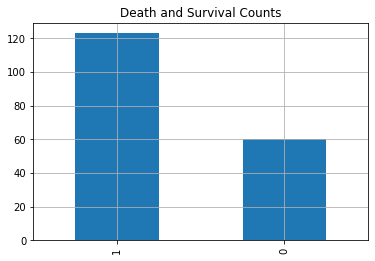

In [14]:
df1['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True)
plt.show()

observation: Majority of people did not survive the accident

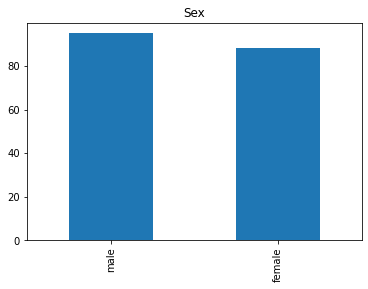

In [15]:
df1['Sex'].value_counts().plot(kind='bar', title='Sex')
plt.show()

observation: Majority of people were male in the ship

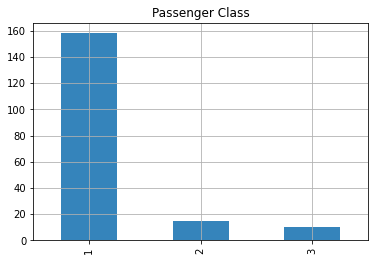

In [16]:
df1['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',alpha=0.90,grid=True)
plt.show()

observation: Majority of people were in the class 1 on ship

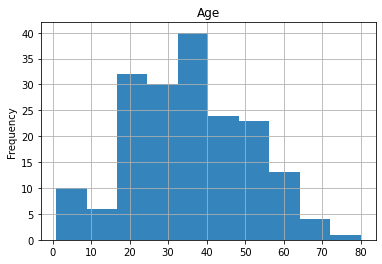

In [17]:
df1['Age'].plot(kind='hist',title='Age',alpha=0.90,grid=True)
plt.show()

Observation:Majority of passengers were in the age group 15-40 years.

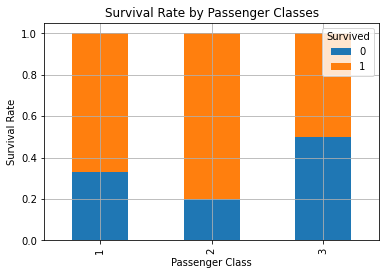

In [18]:
#Passenger class
rel_1=pd.crosstab(df['Pclass'],df1['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

People in 2nd class has highest chance of survival

In [19]:
#Sex Feature
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df1['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


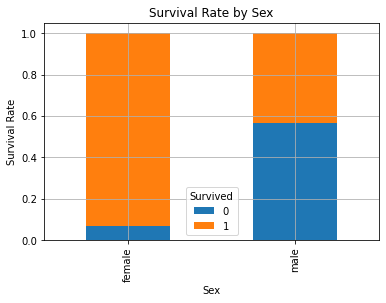

In [20]:
rel_2=pd.crosstab(df1['Sex'],df1['Survived'])
rel_2_normalize=rel_2.div(rel_2.sum(1).astype(float),axis=0)
rel_2_normalize.plot(kind='bar',title='Survival Rate by Sex',stacked=True,grid=True) 
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

majority of females survived, whereas the majority of males did not survived

In [21]:
#Count males and females in each Pclass
#Get the unique values of Pclass
passenger_classes = sorted(df1['Pclass'].unique())
passenger_classes

[1, 2, 3]

In [24]:
for i in passenger_classes:
        print ('M : ',i ,len(df1[(df1['Sex'] == 'male')  & (df1['Pclass'] == i)]))
        print ('F : ',i ,len(df1[(df1['Sex'] =='female') & (df1['Pclass'] == i)]))
male=df1[df1['Sex']=='male']
female=df1[df1['Sex']=='female']

M :  1 84
F :  1 74
M :  2 6
F :  2 9
M :  3 5
F :  3 5


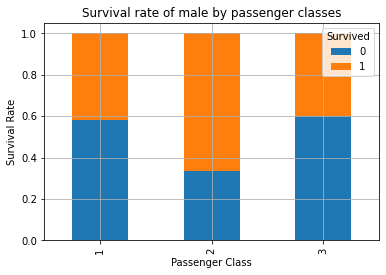

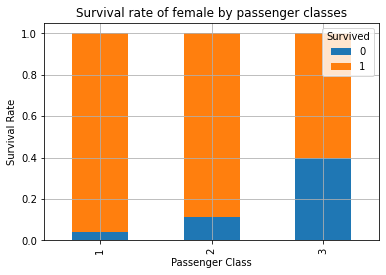

In [25]:
#Plot survival rate by Sex and Pclass

male_rel=pd.crosstab(male['Pclass'],male['Survived'])
male_rel_normalize=male_rel.div(male_rel.sum(1).astype(float),axis=0)
male_rel_normalize.plot(kind='bar',title='Survival rate of male by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
female_rel=pd.crosstab(female['Pclass'],female['Survived'])
female_rel_normalize=female_rel.div(female_rel.sum(1).astype(float),axis=0)
female_rel_normalize.plot(kind='bar',title='Survival rate of female by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [26]:
df1['Embarked_Value']=df1['Embarked']
df1['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
embarked_locs = sorted(df1['Embarked_Value'].unique())

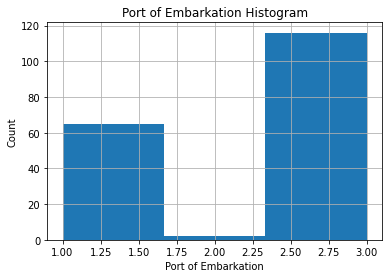

In [27]:
df1['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [30]:
df1['Embarked_Value']=df1['Embarked']
df1['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)

In [32]:
embarked_locs = sorted(df1['Embarked_Value'].unique())
embarked_locs

[1, 2, 3]

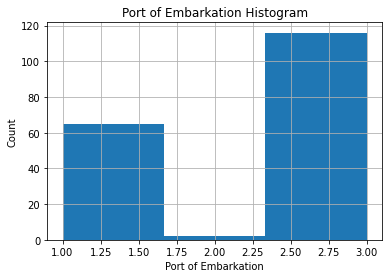

In [33]:
df1['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Most of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S'

In [34]:
df1['Embarked_Value']=df1['Embarked_Value'].fillna(3)
embarked_locs = sorted(df1['Embarked_Value'].unique())
embarked_locs

[1, 2, 3]

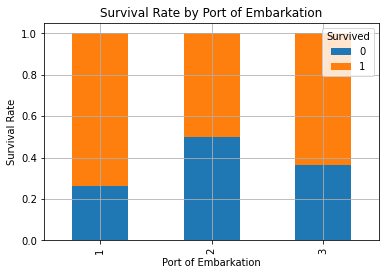

In [35]:
embarked_rel=pd.crosstab(df1['Embarked_Value'],df1['Survived'])
embarked_rel_normalize=embarked_rel.div(embarked_rel.sum(1).astype(float),axis=0)
embarked_rel_normalize.plot(kind='bar',title='Survival Rate by Port of Embarkation',grid='True',stacked='True')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

In [38]:
#Age Feature
df1['Age_complete'] = df1['Age']
df1['Age_complete']=df1['Age_complete'].groupby([df1['Sex_Val'],df1['Pclass']]).apply(lambda x: x.fillna(x.median()))
df1['Age_complete'].head()


1     38.0
3     35.0
6     54.0
10     4.0
11    58.0
Name: Age_complete, dtype: float64

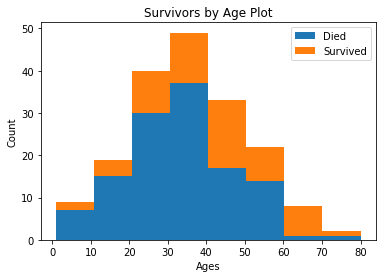

In [39]:
age_survived=df1[df1['Survived']==1]['Age_complete']
age_not_survived = df1[df1['Survived'] == 0]['Age_complete']
max_age=max(df1['Age_complete'])

plt.hist([age_survived,age_not_survived],bins=8,range=(1, max_age),stacked=True)
plt.title('Survivors by Age Plot')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend(('Died', 'Survived'), loc='best')
plt.show()


observation: first class passengers were generally older then second class passengers, which in turn were older than third class passengers

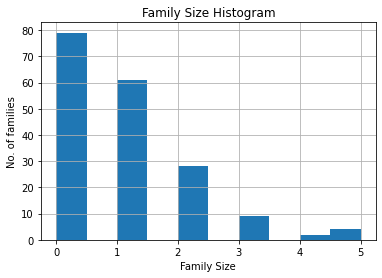

In [41]:
#Family Size Feature: is the sum of Parch (number of parents or children on board) and SibSp (number of siblings or spouses)
df1['Family_Size'] = df1['SibSp'] + df1['Parch']
df1['Family_Size'].hist(bins=10)
plt.xlabel('Family Size')
plt.ylabel('No. of families')
plt.title('Family Size Histogram')
plt.show()

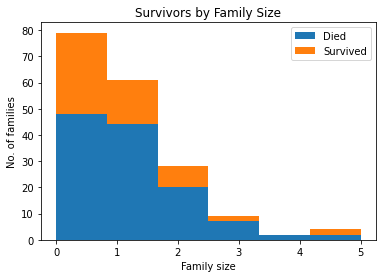

In [42]:
family_sizes=sorted(df1['Family_Size'].unique())
family_sizes_max=max(family_sizes)
family_size_survived=df1[df1['Survived']==1]['Family_Size']
family_size_not_survived=df1[df1['Survived']==0]['Family_Size']
plt.hist([family_size_survived,family_size_not_survived],bins=family_sizes_max+1,range=(0, family_sizes_max),stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.xlabel('Family size')
plt.ylabel('No. of families')
plt.title('Survivors by Family Size')
plt.show()

Model for ML

We drop the columns having strings in it or those which we have used like we remove SibSp and Parch as we use Family_Size which has the attributes of both of them

In [43]:
df1.dtypes[df1.dtypes.map(lambda x: x == 'object')]
df1=df1.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)
df1.head()

,Survived,Pclass,Fare,Sex_Val,Age_complete,Family_Size
1,1,1,71.2833,0,38.0,1
3,1,1,53.1000,0,35.0,1
6,0,1,51.8625,1,54.0,0
10,1,3,16.7000,0,4.0,2
11,1,1,26.5500,0,58.0,0


In [53]:

def data_prep(df_given):
    # Get the unique values of Sex
    sexes = sorted(df_given['Sex'].unique())
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
   # Transform Sex from a string to a number representation
    df_given['Sex_Val'] = df_given['Sex'].map(genders_mapping).astype(int)
        # Get the unique values of Embarked
    df_given['Embarked_Value']=df_given['Embarked']
    df_given['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
    df_given['Embarked_Value']=df_given['Embarked_Value'].fillna(3)
   # embarked_locs = sorted(df_given['Embarked_Value'].unique())
    # Fill in missing values of Fare with the average Fare
    if len(df_given[df_given['Fare'].isnull()] > 0):
        avg_fare = df_given['Fare'].mean()
        df_given['Fare'].fillna(avg_fare, inplace=True)
    df_given['Age_complete'] = df_given['Age']
    df_given['Age_complete']=df_given['Age_complete'].groupby([df_given['Sex_Val'],df_given['Pclass']]).apply(lambda x: x.fillna(x.median()))
    df_given['Family_Size'] = df_given['SibSp'] + df_given['Parch']
    # Drop the columns we won't use:
    # Drop the Age column since we will be using the Age_omplete column instead.
    # Drop the SibSp and Parch columns since we will be using Family_Size.
    # Drop the PassengerId column since it won't be used as a feature.
    df_given=df_given.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)#axis=1 means columns
    #if drop_passenger_id:
     #   df_given = df_given.drop(['PassengerId'], axis=1)
    
    return df_given


Machine learning algorithms (model fit)

In [45]:
train_data=df1.values

# Naive_Bayes Classifier

In [46]:
clf = GaussianNB()

In [47]:
train_features = train_data[:, 1:]
train_target = train_data[:, 0]

In [54]:
df_test1 = pd.read_csv('titanic_train.csv')    
df_test = data_prep(df_test1)
test_x1 = df_test.values


test_y1 is the predicted Survival values of the test data and thus our answer.

Now we check the accuracy of our databy training with 80% of our data and testing on rest 20%

In [56]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, train_target, test_size=0.20, random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(183, 5) (183,)
(146, 5) (146,)
(37, 5) (37,)


In [57]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)
from sklearn.metrics import accuracy_score
print ("Naive Bayes Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))


Naive Bayes Accuracy = 0.81


In [62]:
X=test_x
test_y1 = clf.predict(X)
test_y1

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1.])

In [64]:
RandomForest = RandomForestClassifier(n_estimators=1000)
RandomForest.fit(train_x,train_y)
predict_y = RandomForest.predict(test_x)
print ("RandomForest Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

RandomForest Accuracy = 0.78


In [65]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
predict_y = knn.predict(test_x)
print ("Kmeans Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Kmeans Accuracy = 0.65


In [66]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
predict_y = logreg.predict(test_x)
print ("Regression Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Regression Accuracy = 0.84


In [67]:
svc = SVC()
svc.fit(train_x, train_y)
predict_y = svc.predict(test_x)
print ("SVC Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

SVC Accuracy = 0.81


In [68]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
predict_y = decision_tree.predict(test_x)
print ("Decision Tree Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Decision Tree Accuracy = 0.84


In [69]:
sgd = SGDClassifier(max_iter=100)
sgd.fit(train_x, train_y)
predict_y = sgd.predict(test_x)
print ("Gradient Descent Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Gradient Descent Accuracy = 0.57


 LogisticRegression model is best 

In [75]:
import pickle

In [79]:
filename = 'titanic_train.csv'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.